<div class="alert alert-info">
    
# FINAL PROJECT: 
**Analysis of user behavior in a mobile application for selling of used and unneeded stuff**

<div style="border:solid green 2px; padding: 20px">
    
In the app **"Thrifted Stuff"**, users sell their unneeded things by posting them on the bulletin board. It is necessary to conduct a study of the service audience on the logs of user events in the application, committed after 07.10.2019.

**The purpose of the study** is to analyze the impact of different events on the occurrence of the target contacts_show event, to evaluate which events are more likely to be committed by users who view contacts on the ad page. Based on user segmentation, determine how the app can be improved in terms of customer experience. 

**Research Objectives:**
- To identify user segments based on committing events.
- To investigate which users tend to return to the mobile app more often.
- To investigate which users are more likely to commit a target event (conversion to a target action).
- Determine how the time between common events varies between users from different groups.

Data source - 2 datasets: one with user actions in the app, the other with data on app download sources.
    
**Dataset mobile_dataset.csv contains columns:**
- event.time - time of occurrence
- event.name - event name
- user.id - user id

**Dataset mobile_sources.csv contains columns:**
- userId - user id
- source - source from which the user installed the application

**Events:**
- advert_open - opening the ad card
- photos_show - viewing photos in the ad
- tips_show - user saw recommended ads
- tips_click - user clicked on a recommended ad
- contacts_show and show_contacts - user clicked on the "see phone number" button on the ad card
- contacts_call - the user called the phone number on the ad card
- map - the user opened the map of placed ads
- search_1 - search_7 - different events related to site search
- favorites_add - add ad to favorites

<div class="alert alert-success">

## 1 Downloading files and data familiarization

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action = 'ignore')

In [2]:
# read the csv files and save them to variables and getting general information about datasets
df = pd.read_csv('mobile_dataset.csv')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


In [3]:
sourсes = pd.read_csv('mobile_sourсes.csv')

sourсes.info()
sourсes.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
5,17f6b2db-2964-4d11-89d8-7e38d2cb4750,yandex
6,62aa104f-592d-4ccb-8226-2ba0e719ded5,yandex
7,57321726-5d66-4d51-84f4-c797c35dcf2b,google
8,c2cf55c0-95f7-4269-896c-931d14deaab5,google
9,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex


In [4]:
# number of unique users in the first dataset
df['user.id'].nunique()

4293

In [5]:
# distribution of unique values of event.name and source columns
print(df['event.name'].value_counts())
sourсes['source'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event.name, dtype: int64


yandex    1934
other     1230
google    1129
Name: source, dtype: int64

In [6]:
# checking for duplicate strings
print(df.duplicated().sum())
sourсes.duplicated().sum()

0


0

<div style="border:solid green 2px; padding: 20px">
    
- The dataset with logs contains 3 columns and 74197 rows. Dataset with sources contains 2 columns and 4293 rows. 
- There are no missing values or duplicates in both datasets. 
- The first dataset has a column with date and time in object format. 
- In the event view there are options contacts_show and show_contacts, although they are the same thing.
- The unique number of users in the first dataset is 4293, as is the number of rows in the second dataset. But it is better to check if they are the same users or not.

<div class="alert alert-success">

## 2 Data preprocessing

In [7]:
# converting a column with date and time to the required format
df['event.time'] = pd.to_datetime(df['event.time'], format='%Y-%m-%d %H:%M:%S.%f')

In [8]:
# minimum and maximum dates in the dataset
print(df['event.time'].min())
print(df['event.time'].max())

2019-10-07 00:00:00.431357
2019-11-03 23:58:12.532487


In [9]:
# renaming "show_contacts" to "contacts_show" values
df['event.name'] = df['event.name'].replace('show_contacts', 'contacts_show')
df['event.name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event.name, dtype: int64

In [10]:
# duplicate check after renaming
df.duplicated().sum()

0

In [11]:
# renaming columns for better readability
df.columns = df.columns.str.replace('.', '_')
sourсes.columns = ['user_id', 'source']

In [12]:
# merge datasets by user_id
df = df.merge(sourсes, on='user_id', how='left')
df.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


In [13]:
len(df)

74197

<div style="border:solid green 2px; padding: 20px">
    
- The length of the dataset remained the same after the merge. So, the unique user_id values in the datasets are the same.
- The dataset contains data from October 7 through November 3, 2019.
- The most common event type is tips_show (user saw recommended ads). It was performed 40055 times.

<div class="alert alert-success">

## 3 Exploratory data analysis

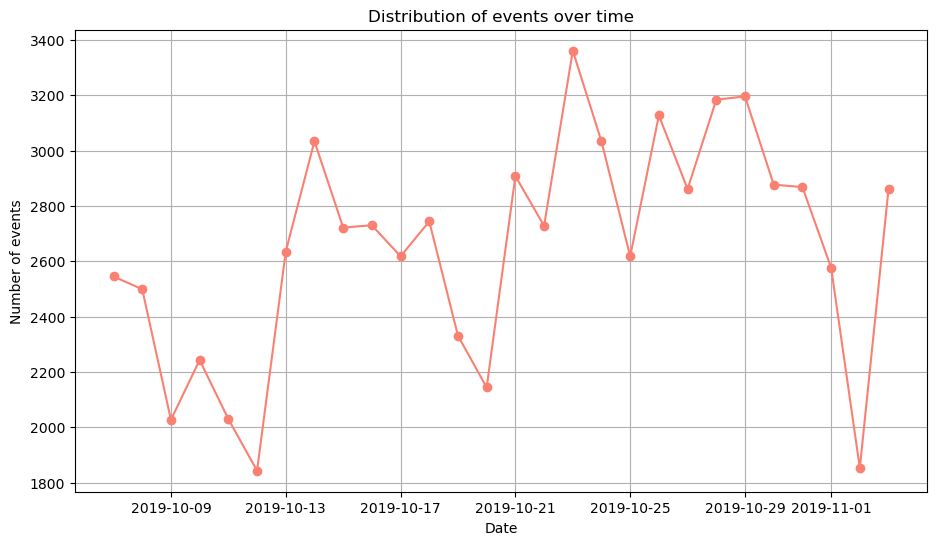

In [14]:
# grouping data by date and counting the number of events
events_by_date = df.groupby(df['event_time'].dt.date)['event_time'].count()

# plotting a graph
plt.figure(figsize=(11, 6))
events_by_date.plot(kind='line', marker='o', color='salmon')
plt.title('Distribution of events over time')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.grid(True)
plt.show()

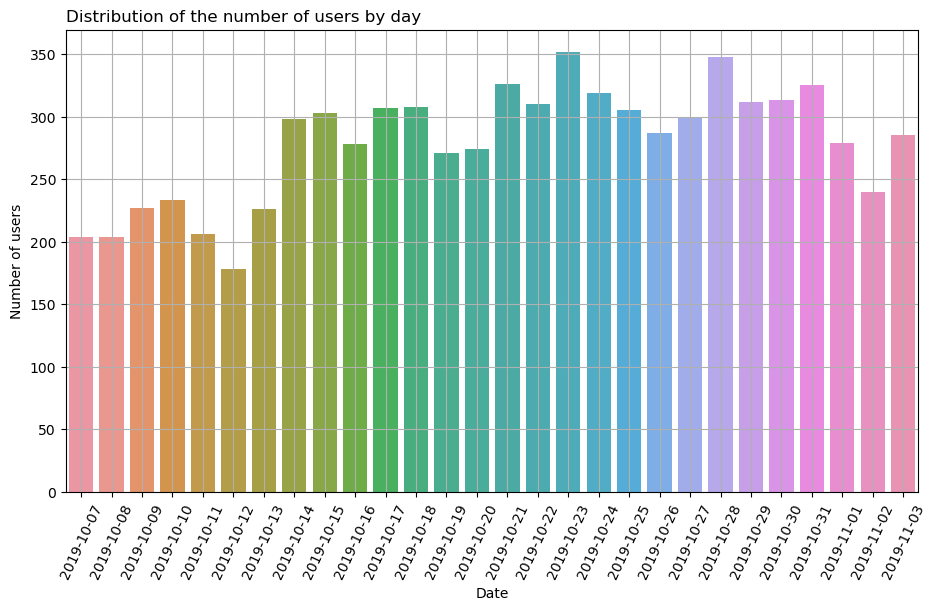

In [15]:
# grouping data by date and counting the number of users
users_by_date = df.groupby(df['event_time'].dt.date)['user_id'].nunique().reset_index()

# plotting a graph
plt.figure(figsize=(11, 6))
sns.barplot(x='event_time', y='user_id', data=users_by_date) 
plt.title('Distribution of the number of users by day', loc = 'left') 
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation= 65)
#plt.subplots_adjust(wspace=2, hspace=2)
plt.grid(True)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- The number of events during one day ranges from 1830 to 3380. The least number of user actions was made on October 9, 11-12, and November 2. The most actions were performed on October 14, 23-24, 26, 28-29.
- The most users logged into the app on Oct. 23 and Oct. 28 - about 350 users. The least number of users were in the app on October 12 - about 177 users, as well as on October 7-8 and 11 - a little more than 200 users per day.

In [16]:
# grouping data by users and events
grouped_df = df.groupby(['user_id', 'event_name'])['event_time'].count().reset_index()

# grouping data by events and calculation of maximum, minimum, mean and median values
summary_df = grouped_df.groupby('event_name')['event_time'].agg(['min', 'max', 'mean', 'median']).reset_index()

# renaming columns for clarity
summary_df.columns = ['event_name', 'min_count', 'max_count', 'mean_count', 'median_count']

summary_df

,event_name,min_count,max_count,mean_count,median_count
0,advert_open,1,137,8.207723,4.0
1,contacts_call,1,17,2.539906,2.0
2,contacts_show,1,137,4.616718,2.0
3,favorites_add,1,63,4.037037,2.0
4,map,1,71,2.665522,1.0
5,photos_show,1,177,9.143379,5.0
6,search_1,1,68,4.454892,3.0
7,search_2,1,23,1.338843,1.0
8,search_3,1,21,2.509615,2.0
9,search_4,1,35,1.478903,1.0


In [17]:
# calculate the following metrics to determine how many users on average use the app per day and per week:
# DAU (daily active users) — number of unique users per day
# WAU (weekly active users) — number of unique users per week
df['event_date'] = df['event_time'].dt.date.astype('datetime64')
df['event_week'] = df['event_time'].dt.week
DAU = df.groupby('event_date').agg({'user_id': 'nunique'}).mean()
WAU = df.groupby('event_week').agg({'user_id': 'nunique'}).mean()
print(f'Average number of unique users per day: {DAU}')
print(f'Average number of unique users per week: {WAU}')

Average number of unique users per day: user_id    279.178571
dtype: float64
Average number of unique users per week: user_id    1382.5
dtype: float64


In [18]:
# calculation of the average number of events per user per day and per week
print('Average number of events per user per day:', 
      df.groupby('event_date').agg({'user_id': 'count'}).mean() / 
      df.groupby('event_date').agg({'user_id': 'nunique'}).mean())

print('Average number of events per user per week:', 
      df.groupby('event_week').agg({'user_id': 'count'}).mean() / 
      df.groupby('event_week').agg({'user_id': 'nunique'}).mean())

Average number of events per user per day: user_id    9.491749
dtype: float64
Average number of events per user per week: user_id    13.417179
dtype: float64


<div style="border:solid green 2px; padding: 20px">
    
- The tips_show action was most often performed, and the photos_show event was performed less often. There is a very large difference between the mean and median of all events, indicating the presence of outliers.
- On average, the app was visited by about 279 users per day and about 1382 per week. 
- One user averaged about 9 actions per day and about 13 per week.

In [19]:
# grouping of all events by user
events_count = df.groupby('user_id')[['event_name']].count().reset_index()
events_count.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

,event_name
count,4293.000000
mean,17.283252
std,29.130677
min,1.000000
5%,3.000000
25%,5.000000
50%,9.000000
75%,17.000000
90%,36.000000
95%,59.000000


<div style="border:solid green 2px; padding: 20px">
    The average number of events per user is 17.28 and the median is 9. Such a large difference between these values indicates the presence of abnormal values. 75% percentile equals 17 events, 90% percentile equals 36, 95% percentile equals 59, 99% percentile equals 132, and the maximum number of events per user equals 478. The maximum value is an outlier, however if this user is removed, the dataset will lose 478 events, which is 11.13% of the number of events by user, which is too many. Let's take a closer look at the actions of this overactive user, as well as users who have only 1 event.

In [20]:
# allocation of users with 1 event to a separate dataframe
pd.set_option('display.max_rows', None)
single_event_users = df[df['user_id'].isin(events_count[events_count['event_name'] == 1]['user_id'])]
single_event_users

,event_time,event_name,user_id,source,event_date,event_week
685,2019-10-07 12:56:48.260671,tips_show,af23f38a-cfa8-4e82-83d9-4914c11c1bdb,yandex,2019-10-07,41
916,2019-10-07 14:30:22.990928,tips_show,a328c7d1-ff5b-41df-822a-bccb105fb408,google,2019-10-07,41
4256,2019-10-08 16:48:44.466164,map,3f3b2abf-f9fa-40fc-9319-3578ed857391,yandex,2019-10-08,41
4379,2019-10-08 18:22:19.509042,search_1,d64a7f4f-bebe-4893-8b44-683ea136b86b,other,2019-10-08,41
5903,2019-10-09 13:38:51.658132,contacts_show,5f2607e8-5f7e-476e-9ef4-f17a26afe6c8,other,2019-10-09,41
6214,2019-10-09 15:52:42.980257,map,e5199366-ab59-44c1-9d52-e20cf23cbc5e,other,2019-10-09,41
9644,2019-10-11 11:01:37.729360,tips_show,8bc67b38-7e6d-4084-b354-58b30d8f1e6d,google,2019-10-11,41
9892,2019-10-11 12:23:25.907020,map,5bfdb95a-9d12-4436-b371-22754434d0d4,google,2019-10-11,41
10591,2019-10-11 16:46:49.111461,tips_show,28d03e3b-15af-467e-b492-930231df1f37,yandex,2019-10-11,41
11843,2019-10-12 13:17:59.559503,tips_show,b64837e2-93a8-435b-8ca5-c209e2f81c12,other,2019-10-12,41


<div style="border:solid green 2px; padding: 20px">
    There are 65 users in the dataset who have committed only 1 single event. These users logged into the application on almost all dates that are in the dataset. Source is also of all three types. The event types are also different and there is no pattern.  Thus, the users who committed 1 event have nothing in common. Their number is about 1.5% of all unique users, so they can be removed as they are not important for further analysis.

In [21]:
# creating a dataset without users who performed 1 action
df_filtered = df[~df['user_id'].isin(single_event_users['user_id'])]
len(df_filtered)

74132

In [22]:
# counting the number of users whose number of events is greater than or equal to 132
events_count[events_count['event_name'] >= 132].shape[0]

44

<div style="border:solid green 2px; padding: 20px">
    Forty-four users have the number of in-app actions equal to or greater than the 99th percentile. If these users are deleted, the dataset will lose about 18% of all events. This is too high a proportion, so you should not delete these users.

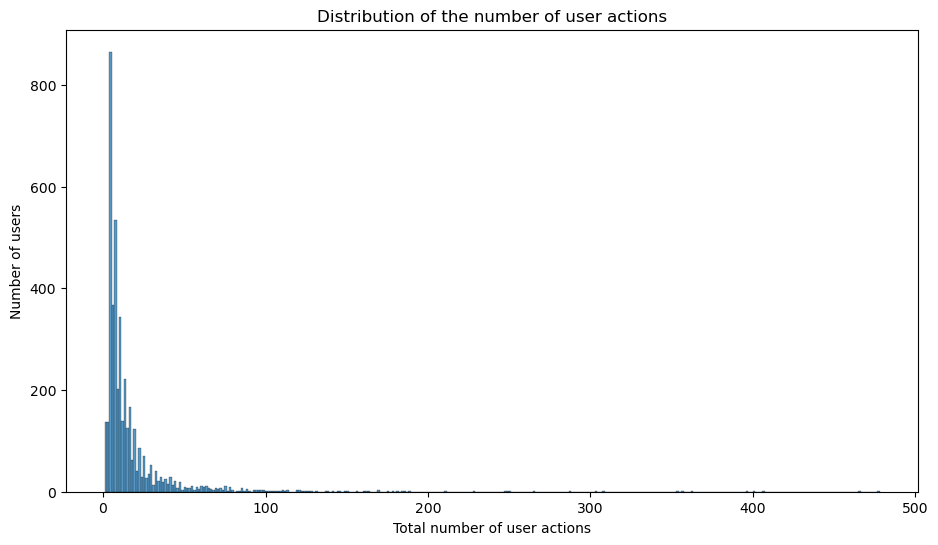

In [23]:
# plotting a graph of number of actions by user
plt.figure(figsize=(11, 6))
sns.histplot(events_count['event_name'])
plt.title('Distribution of the number of user actions')
plt.xlabel('Total number of user actions')
plt.ylabel('Number of users')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    Due to the large number of outliers, the histogram is not sufficiently informative. Most often a user performs 3-15 actions in the application.

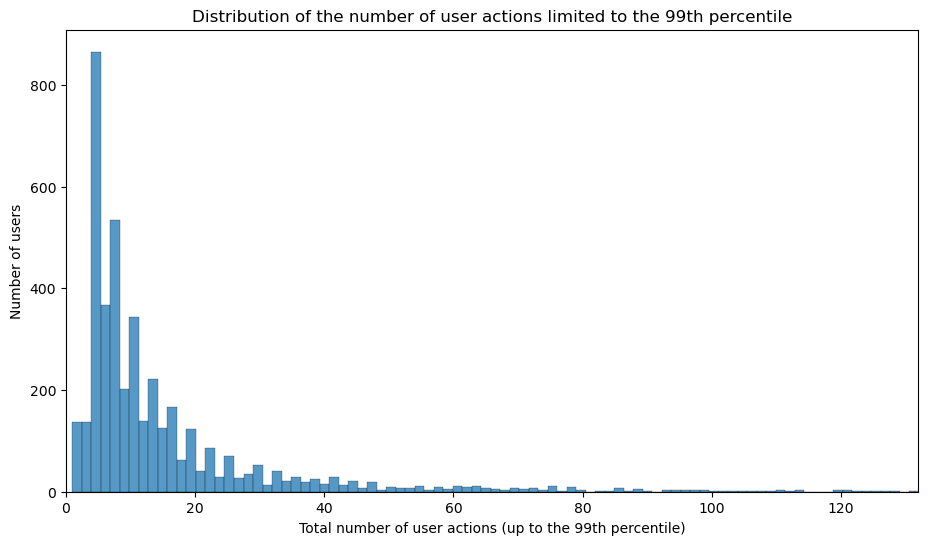

In [24]:
# histogram construction with limitation by 99th percentile
plt.figure(figsize=(11, 6))
ax = sns.histplot(events_count['event_name'])

# x-axis limit setting
ax.set_xlim(left=0, right=132)

plt.title('Distribution of the number of user actions limited to the 99th percentile')
plt.xlabel('Total number of user actions (up to the 99th percentile)')
plt.ylabel('Number of users')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    Now the histogram is much more informative. The majority of users made 4 to 7 actions in the application. Also a significant share of users have performed from 8 to 20 actions. And there are very few users who have made more than 50 actions.

In [25]:
all_users = df['user_id'].nunique()
print('Unique users:', all_users)

Unique users: 4293


In [26]:
# creating a list of users who have performed a targeted action
targeted_action_users = df_filtered.query('event_name =="contacts_show"')['user_id'].unique()
targeted_action_users_list = list(targeted_action_users)
print('Number of users who took a targeted action:', len(targeted_action_users_list))
print()
print('Which is', format(len(targeted_action_users_list)/all_users*100, '.2f'),'% of the total number of users')

Number of users who took a targeted action: 975

Which is 22.71 % of the total number of users


In [27]:
# checking the relationship between user activity and the target action
df_filtered.query('user_id == @targeted_action_users_list').groupby('user_id')['event_name'].count().describe()

count    975.000000
mean      27.888205
std       47.648189
min        2.000000
25%        7.000000
50%       13.000000
75%       27.500000
max      478.000000
Name: event_name, dtype: float64

In [28]:
df_filtered.query('user_id != @targeted_action_users_list').groupby('user_id')['event_name'].count().describe()

count    3253.000000
mean       14.430065
std        19.819956
min         2.000000
25%         5.000000
50%         8.000000
75%        15.000000
max       407.000000
Name: event_name, dtype: float64

<div style="border:solid green 2px; padding: 20px">
    Overall, we can say that users who took a targeted action were more active in using the app. Their average number of events was 27.89, while in the group that did not perform the target action - 14.43 events. The median number of events in the group that performed the target action was 13, and in the group that did not perform the target action - 8 events. The 75th percentile is 27.5, and among users without a target event it is 15 events. The maximum value among the users who committed the target event is 478 and the others have 407 events.

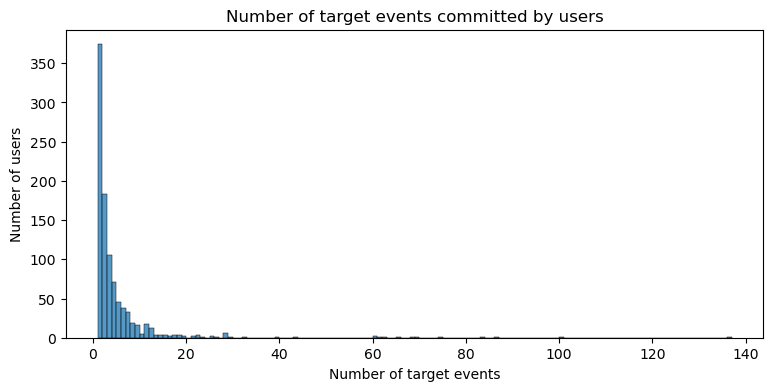

In [29]:
# counting the number of target events that users have performed
contacts_show_users = df_filtered.query('event_name == "contacts_show"').groupby('user_id')['event_name'].count().reset_index()

# plotting a graph of number of target events by user
plt.figure(figsize=(9, 4))
sns.histplot(contacts_show_users['event_name'], binwidth=1)
plt.title('Number of target events committed by users')
plt.xlabel('Number of target events')
plt.ylabel('Number of users')

plt.show()

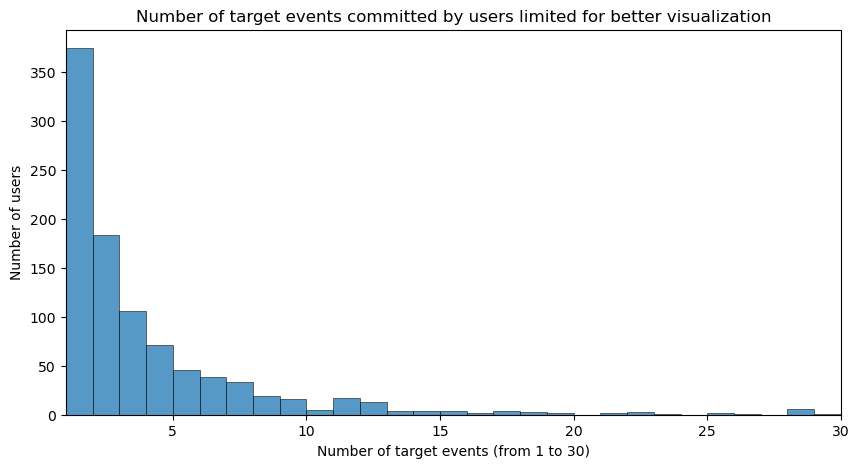

In [30]:
# histogram plotting with x-axis constraint for better visualization
plt.figure(figsize=(10, 5))
ax = sns.histplot(contacts_show_users['event_name'], binwidth=1)

# x-axis limit setting
ax.set_xlim(left=1, right=30)

plt.title('Number of target events committed by users limited for better visualization')
plt.xlabel('Number of target events (from 1 to 30)')
plt.ylabel('Number of users')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    There are a lot of anomalous values in the number of target events per user, as well as in the number of all events. But we cannot remove them, because it also shows the behavior of users. Most users (about 370) performed a target action 1 time, about 180 users - 2 times, about 110 users - 3 times, about 70 users - 4 times. Between 5 and 7 target actions were performed by 40-50 users each.

In [31]:
# distribution of users who performed the target action by source
df_filtered[df_filtered['event_name'] == 'contacts_show'].groupby('source')['user_id'].nunique()

source
google    274
other     225
yandex    476
Name: user_id, dtype: int64

<div style="border:solid green 2px; padding: 20px">
    The distribution of users who committed a target event in the application by source type is roughly the same as the distribution of all users. Therefore, at first glance, it cannot be said that the source affects the execution of the target action.

<div class="alert alert-success">
    
## 4 Allocating user sessions

<div style="border:solid green 2px; padding: 20px">

To generate user profiles, we need to prepare session data - a series of actions in the application performed during a single visit.
    
Most researchers believe that the timeout between different sessions in such mobile applications is 30 minutes. Therefore, we will take the gap of 30 minutes as a gap to distinguish the sessions.

In [32]:
# sorting the dataframe by event time and users
df_filtered = df_filtered.sort_values(['user_id', 'event_time'])

# differentiating the 30-minute pause in sessions for each group of events and finding the cumulative amount
session = ((df_filtered.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum())

# creating a new session_id column 
df_filtered['session_id'] = df_filtered.groupby(['user_id', session], sort=False).ngroup() + 1
df_filtered.head(10)

,event_time,event_name,user_id,source,event_date,event_week,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
831,2019-10-07 13:45:43.212340,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
832,2019-10-07 13:46:31.033718,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
836,2019-10-07 13:47:32.860234,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
839,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,41,2


In [64]:
# creating a dataframe with sessions
#sessions = df_filtered.groupby(['user_id', 'session_id']).agg({'event_time':['first', 'last'], 'event_name':'count'}).reset_index()
#sessions = sessions.set_axis(['user_id', 'session_num', 'session_start', 'session_end', 'events_count'], axis='columns')

# Creating a dataframe with sessions
sessions = df_filtered.groupby(['user_id', 'session_id']).agg(
    session_start=('event_time', 'first'),
    session_end=('event_time', 'last'),
    events_count=('event_name', 'count')
).reset_index()

# Assigning session number for each user
sessions['session_num'] = sessions.groupby('user_id').cumcount() + 1

# Dropping the session_id column
sessions = sessions.drop(columns='session_id')

# Aggregating data by session number for each user
sessions = sessions.groupby(['user_id', 'session_num']).agg(
    session_start=('session_start', 'first'),
    session_end=('session_end', 'last'),
    events_count=('events_count', 'sum')
).reset_index()

# creating a dataframe for the very first event for each user
user_start = df_filtered.groupby('user_id').agg({'event_time':'first'}).reset_index()
user_start.rename(columns={'event_time':'first_visit'}, inplace=True)

# joining user_start dataframe to session data
sessions = sessions.merge(user_start, on='user_id', how='left')

# calculation of the Lifetime for each session in days
sessions['lifetime'] = (sessions['session_start'] - sessions['first_visit']).dt.days

# saving the day of the visit separately in the application
sessions['dt'] = sessions['first_visit'].dt.date

# session duration - as the interval between the first and the last event in the session
sessions['duration'] = sessions.session_end - sessions.session_start

# length display in minutes
sessions['duration'] = sessions['duration'].dt.total_seconds() / 60

sessions.head(10)

,user_id,session_num,session_start,session_end,events_count,first_visit,lifetime,dt,duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9,2019-10-07 13:39:45.989359,0,2019-10-07,9.928788
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,4,2019-10-07 13:39:45.989359,2,2019-10-07,8.456433
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14,2019-10-07 13:39:45.989359,14,2019-10-07,14.987868
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,8,2019-10-07 13:39:45.989359,14,2019-10-07,12.636196
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,9,2019-10-19 21:34:33.849769,0,2019-10-19,25.346455
5,00157779-810c-4498-9e05-a1e9e3cedf93,2,2019-10-20 18:49:24.115634,2019-10-20 20:05:36.234073,18,2019-10-19 21:34:33.849769,0,2019-10-19,76.201974
6,00157779-810c-4498-9e05-a1e9e3cedf93,3,2019-10-24 10:50:40.219833,2019-10-24 10:57:12.675110,9,2019-10-19 21:34:33.849769,4,2019-10-19,6.540921
7,00157779-810c-4498-9e05-a1e9e3cedf93,4,2019-10-29 21:18:24.850073,2019-10-29 22:10:25.712840,20,2019-10-19 21:34:33.849769,9,2019-10-19,52.014379
8,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-30 07:50:45.948358,2019-10-30 08:26:53.933176,14,2019-10-19 21:34:33.849769,10,2019-10-19,36.133080
9,00157779-810c-4498-9e05-a1e9e3cedf93,6,2019-11-03 17:12:09.708771,2019-11-03 17:12:09.708771,1,2019-10-19 21:34:33.849769,14,2019-10-19,0.000000


In [65]:
print('The number of sessions in the dataset:', len(sessions))

The number of sessions in the dataset: 10303


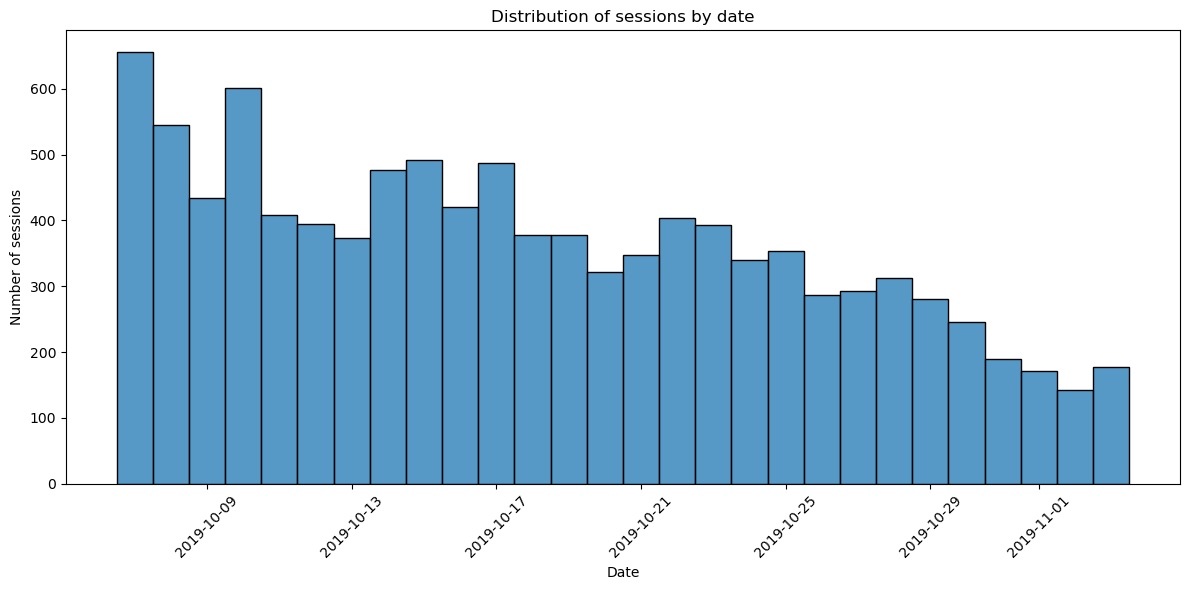

In [35]:
# plotting of distribution by dates for sessions
plt.figure(figsize=(12, 6))
sns.histplot(data=sessions, x='dt')
plt.title('Distribution of sessions by date')
plt.xlabel('Date')
plt.ylabel('Number of sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# general information about Lifetime Sessions
sessions['lifetime'].describe()

count    10303.000000
mean         3.150927
std          5.294476
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         26.000000
Name: lifetime, dtype: float64

In [37]:
# general information about number of events in a session
sessions['events_count'].describe()

count    10303.000000
mean         7.195186
std          9.598757
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        149.000000
Name: events_count, dtype: float64

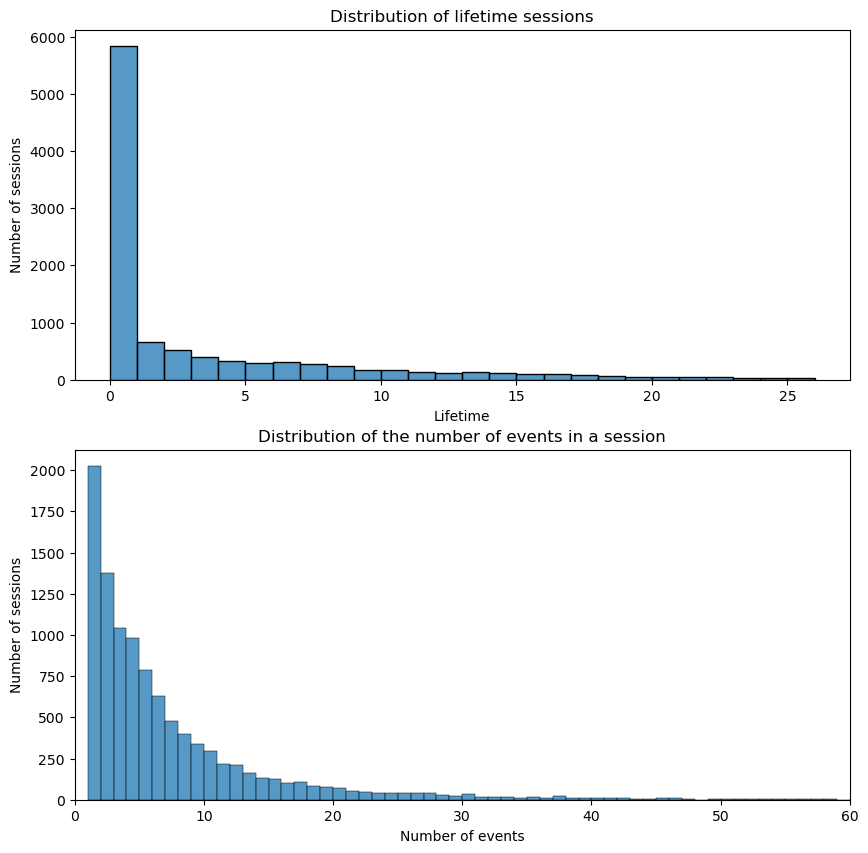

In [38]:
# construction of histograms of the distribution of sessions' lifetimes and the number of events during one session
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(sessions['lifetime'], ax=axes[0], binwidth=1)
axes[0].set_title('Distribution of lifetime sessions')
axes[0].set_xlabel('Lifetime')
axes[0].set_ylabel('Number of sessions')

sns.histplot(sessions['events_count'], ax=axes[1], binwidth=1) 
axes[1].set_title('Distribution of the number of events in a session')
axes[1].set_xlabel('Number of events')
axes[1].set_ylabel('Number of sessions')
axes[1].set_xlim(0, 60)  # setting the x-axis limit to 60 for better clarity

plt.show()

In [39]:
# define for each user the total time in the application and the average time per session
sessions.groupby(['user_id'])['duration'].agg({'sum', 'mean'}).reset_index().describe()

,sum,mean
count,4228.000000,4228.000000
mean,31.579430,14.477998
std,63.124788,15.746101
min,0.000000,0.000000
25%,6.341427,4.216415
50%,15.501253,9.559893
75%,33.619517,19.351764
max,1684.760138,161.014863


In [40]:
print("Number of sessions with zero duration:", (sessions['duration'] == 0).sum())

Number of sessions with zero duration: 2023


In [41]:
# checking information on null sessions
print(sessions[sessions['duration'] == 0]['events_count'].describe())
sessions[sessions['duration'] == 0]['lifetime'].describe()

count    2023.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: events_count, dtype: float64


count    2023.000000
mean        4.528423
std         6.010875
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        26.000000
Name: lifetime, dtype: float64

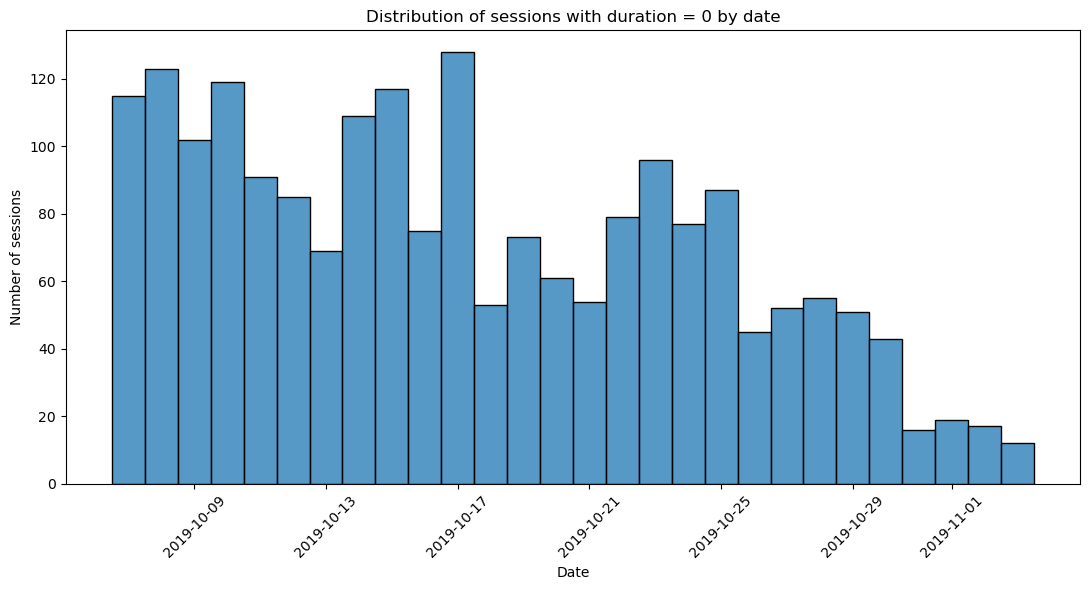

In [42]:
# plotting of distribution by dates for sessions with duration equal to 0
plt.figure(figsize=(11, 6))
sns.histplot(data=sessions[sessions['duration'] == 0], x='dt')
plt.title('Distribution of sessions with duration = 0 by date')
plt.xlabel('Date')
plt.ylabel('Number of sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- When we set the timeout between sessions to 30 minutes, we allocated 10303 sessions to 4228 users.
- In general, the number of sessions per day tends to decrease over the selected period. However, there is an increase in the number of sessions at the beginning of each weekly cycle (Monday-Thursday). On Friday and weekends there are always fewer sessions.
- Most sessions are committed on the first day of using the app. This is evidenced by the fact that in the 'lifetime' column the first quartile and median are 0, and the third quartile is 5 days. The average value is 3.15 due to outliers (the maximum value is 26 days).
- There are also outliers in the number of events in one session - the maximum value is 149 events, while the third quartile is 9 events. The median is 4 events.
- About 5800 sessions (more than half of all sessions) have a lifetime of 0. Between 200 and 500 sessions (per lifetime) have a lifetime of 1 to 7 days.
- More than 2000 sessions have a number of events equal to 1. Two events contain about 1630 sessions, 3-4 events each contains about 1000 sessions (for each number of events). 5 events contains about 750 sessions. 
- The median time spent by a user in the app is 15.5 minutes (with the mean being 31.58 minutes, almost twice as long). The median value of time per session is 9.56 minutes (the average is 14.48 minutes). This difference between the mean and median arose due to users spending a very long time in the app. The maximum amount of time in the app is 1684.76 minutes (this is more than 28 hours) and the maximum session time is 161 minutes.
- Meanwhile, there are 2023 sessions with zero duration in the dataset, which is 19.64% of all sessions.

<div class="alert alert-success">

## 5 Creating user profiles

In [43]:
# convert the first_visit column to datetime format and extract only the date into a separate column
sessions['first_visit_date'] = pd.to_datetime(sessions['first_visit']).dt.date

# creation of retention table - pivot table with the date of the first visit
retention = sessions.pivot_table(index=['first_visit_date'], columns='lifetime', values='user_id', aggfunc='nunique').reset_index()
retention

lifetime,first_visit_date,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,2019-10-07,202.0,24.0,19.0,22.0,11.0,7.0,12.0,16.0,11.0,...,3.0,9.0,4.0,3.0,4.0,7.0,7.0,8.0,9.0,6.0
1,2019-10-08,165.0,27.0,21.0,9.0,7.0,11.0,9.0,12.0,9.0,...,5.0,3.0,7.0,5.0,3.0,4.0,7.0,4.0,4.0,2.0
2,2019-10-09,174.0,13.0,11.0,10.0,12.0,12.0,10.0,13.0,10.0,...,3.0,2.0,5.0,2.0,6.0,2.0,1.0,4.0,3.0,NaN
3,2019-10-10,174.0,15.0,18.0,14.0,16.0,14.0,12.0,9.0,14.0,...,10.0,6.0,5.0,3.0,7.0,3.0,2.0,2.0,NaN,NaN
4,2019-10-11,133.0,12.0,16.0,13.0,12.0,10.0,9.0,6.0,2.0,...,8.0,4.0,3.0,3.0,4.0,4.0,2.0,NaN,NaN,NaN
5,2019-10-12,124.0,15.0,20.0,7.0,8.0,11.0,10.0,11.0,10.0,...,5.0,5.0,3.0,3.0,8.0,4.0,NaN,NaN,NaN,NaN
6,2019-10-13,143.0,19.0,10.0,8.0,10.0,8.0,8.0,7.0,7.0,...,2.0,3.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
7,2019-10-14,182.0,21.0,19.0,19.0,15.0,13.0,9.0,8.0,14.0,...,7.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-10-15,182.0,25.0,16.0,14.0,10.0,10.0,15.0,14.0,12.0,...,5.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-10-16,164.0,21.0,12.0,5.0,8.0,10.0,7.0,9.0,10.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# cohort size calculation
cohort_sizes = (sessions.groupby('first_visit_date').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

# merging cohort sizes and retention table
retention_rate = cohort_sizes.merge(retention, on='first_visit_date', how='left').fillna(0)

# index reset after merging
retention_rate = retention_rate.reset_index()

# splitting the retention table data into cohort sizes
retention_rate.iloc[:, 2:] = retention_rate.iloc[:, 2:].div(retention_rate['cohort_size'], axis=0)

# deleting the 'cohort_size' and index columns
retention_rate.drop(columns=['cohort_size'], inplace=True)
retention_rate.drop(columns=['index'], inplace=True)
retention_rate

,first_visit_date,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,2019-10-07,1.0,0.118812,0.094059,0.108911,0.054455,0.034653,0.059406,0.079208,0.054455,...,0.014851,0.044554,0.019802,0.014851,0.019802,0.034653,0.034653,0.039604,0.044554,0.029703
1,2019-10-08,1.0,0.163636,0.127273,0.054545,0.042424,0.066667,0.054545,0.072727,0.054545,...,0.030303,0.018182,0.042424,0.030303,0.018182,0.024242,0.042424,0.024242,0.024242,0.012121
2,2019-10-09,1.0,0.074713,0.063218,0.057471,0.068966,0.068966,0.057471,0.074713,0.057471,...,0.017241,0.011494,0.028736,0.011494,0.034483,0.011494,0.005747,0.022989,0.017241,0.000000
3,2019-10-10,1.0,0.086207,0.103448,0.080460,0.091954,0.080460,0.068966,0.051724,0.080460,...,0.057471,0.034483,0.028736,0.017241,0.040230,0.017241,0.011494,0.011494,0.000000,0.000000
4,2019-10-11,1.0,0.090226,0.120301,0.097744,0.090226,0.075188,0.067669,0.045113,0.015038,...,0.060150,0.030075,0.022556,0.022556,0.030075,0.030075,0.015038,0.000000,0.000000,0.000000
5,2019-10-12,1.0,0.120968,0.161290,0.056452,0.064516,0.088710,0.080645,0.088710,0.080645,...,0.040323,0.040323,0.024194,0.024194,0.064516,0.032258,0.000000,0.000000,0.000000,0.000000
6,2019-10-13,1.0,0.132867,0.069930,0.055944,0.069930,0.055944,0.055944,0.048951,0.048951,...,0.013986,0.020979,0.013986,0.034965,0.006993,0.000000,0.000000,0.000000,0.000000,0.000000
7,2019-10-14,1.0,0.115385,0.104396,0.104396,0.082418,0.071429,0.049451,0.043956,0.076923,...,0.038462,0.021978,0.016484,0.005495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2019-10-15,1.0,0.137363,0.087912,0.076923,0.054945,0.054945,0.082418,0.076923,0.065934,...,0.027473,0.027473,0.016484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2019-10-16,1.0,0.128049,0.073171,0.030488,0.048780,0.060976,0.042683,0.054878,0.060976,...,0.012195,0.006098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
# create a copy of the retention_rate dataframe to p;ot a heatmap
retention_rate_copy1 = retention_rate.copy()

# deleting the first_visit_date column
retention_rate_copy1 = retention_rate_copy1.drop(columns=['first_visit_date'])

# creating a new column with dates in the format "07 Oct" in order up to "03 Nov"
start_date = pd.to_datetime('2019-10-07')
end_date = pd.to_datetime('2019-11-03')
dates = [start_date + pd.Timedelta(days=i) for i in range(28)]
date_strings = [date.strftime('%d %b') for date in dates]

# adding a new column to a dataframe
retention_rate_copy1['first_visit'] = date_strings
cols = list(retention_rate_copy1.columns)
cols = [cols[-1]] + cols[:-1]
retention_rate_copy1 = retention_rate_copy1[cols]

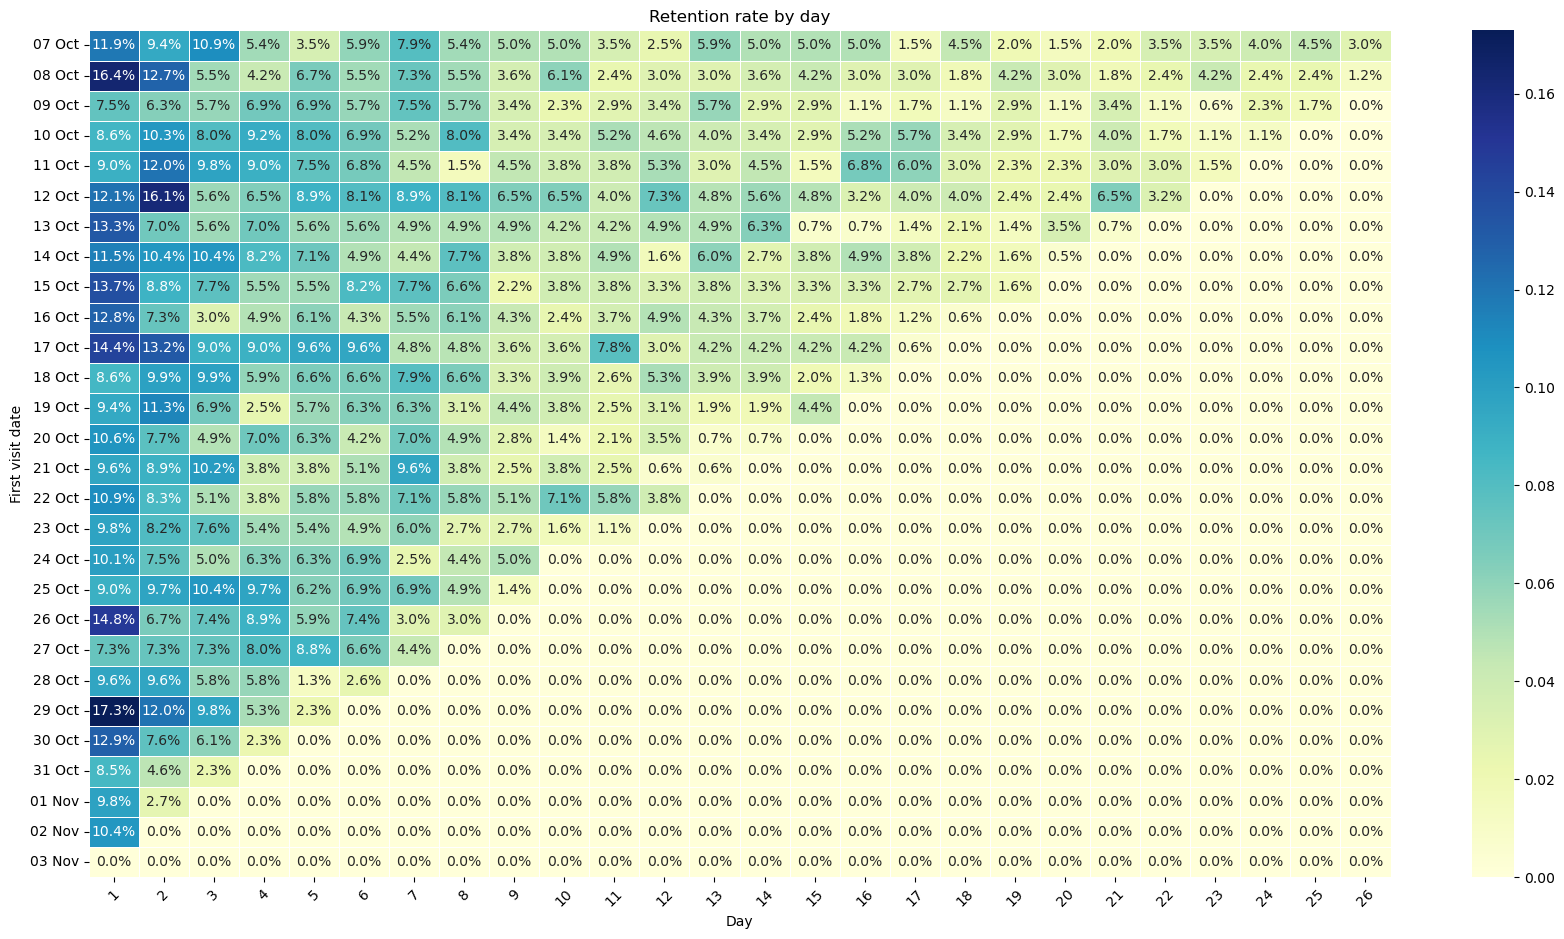

In [46]:
# deletion of the first column with the first day of lifetime, where retention rate is 100% for better visibility heatmap
retention_rate_copy1 = retention_rate_copy1.drop(columns=[0])

# heat map of retention
plt.figure(figsize=(21, 11))
sns.heatmap(retention_rate_copy1.set_index('first_visit'), cmap="YlGnBu", annot=True, fmt=".1%", linewidths=.5)
plt.title('Retention rate by day')
plt.xlabel('Day')
plt.ylabel('First visit date')
plt.xticks(rotation=45)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- In general, on day 7, no more than 9.6% of the number of users on the first day remain in the app, which is quite low for an app of this type. Perhaps the developers should think about changing the interface or additional functionality in the app.
- The maximum retention rate on the seventh day of Lifetime at 9.6% in the October 17 cohort, and on the eighth day - in the October 21 cohort. The October 15 cohort had a retention rate of 8.2% on the seventh day of Lifetime, and 8.1% in the October 12 cohort (and 8.9% on the eighth day). 
- The lowest retention rate on the last days of the seven-day Lifetime in the October 16 and October 20 cohorts.
- Overall for the 7-day period, the best retention rates are in the October 7, 8, 12, 15, and 17 cohorts.

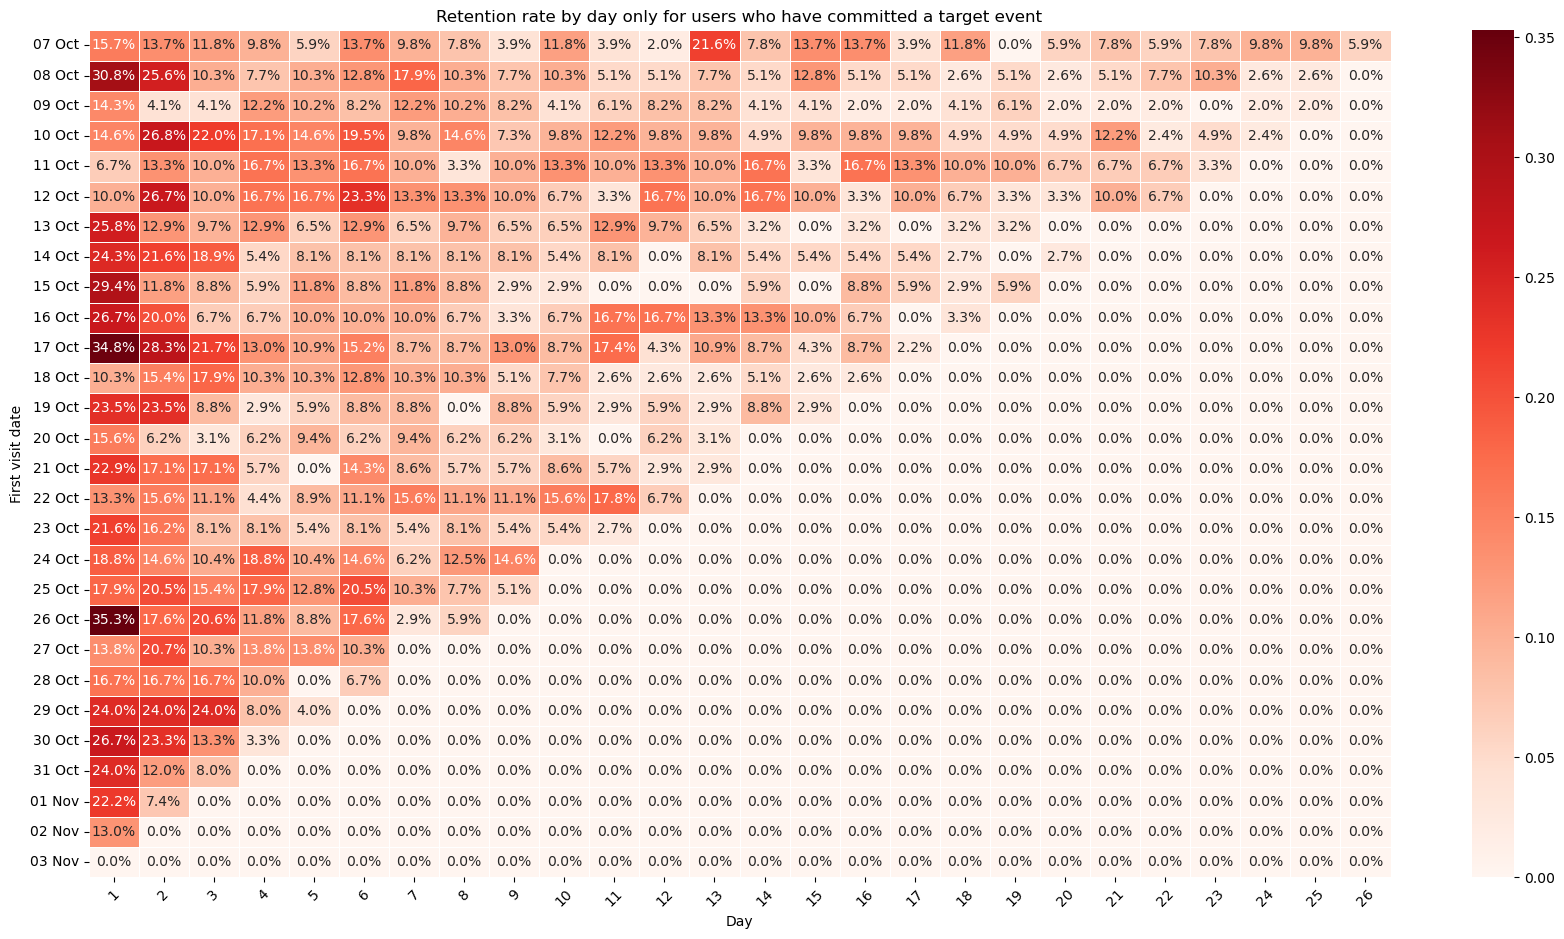

In [47]:
# creation of retention table only for users who have committed a target event
retention_targeted_action = sessions[sessions['user_id'].isin(targeted_action_users_list)].pivot_table(index=['first_visit_date'], columns='lifetime', values='user_id', aggfunc='nunique').reset_index()

# cohort size calculation
cohort_sizes_targeted_action = (sessions[sessions['user_id'].isin(targeted_action_users_list)].groupby('first_visit_date')
                .agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

# merging cohort sizes and retention table
retention_rate_targeted_action = cohort_sizes_targeted_action.merge(retention_targeted_action, on='first_visit_date', how='left').fillna(0)

# index reset after merging
retention_rate_targeted_action = retention_rate_targeted_action.reset_index()

# splitting the retention table data into cohort sizes
retention_rate_targeted_action.iloc[:, 2:] = retention_rate_targeted_action.iloc[:, 2:].div(retention_rate_targeted_action['cohort_size'], axis=0)

# deleting the cohort_size and index columns
retention_rate_targeted_action.drop(columns=['cohort_size'], inplace=True)
retention_rate_targeted_action.drop(columns=['index'], inplace=True)

# deleting the first_visit_date column
retention_rate_targeted_action = retention_rate_targeted_action.drop(columns=['first_visit_date'])

# creating a new column with dates in the format "07 Oct" in order up to "03 Nov"
start_date = pd.to_datetime('2019-10-07')
end_date = pd.to_datetime('2019-11-03')
dates = [start_date + pd.Timedelta(days=i) for i in range(28)]
date_strings = [date.strftime('%d %b') for date in dates]

# adding a new column to a dataframe
retention_rate_targeted_action['first_visit'] = date_strings
cols = list(retention_rate_targeted_action.columns)
cols = [cols[-1]] + cols[:-1]
retention_rate_targeted_action = retention_rate_targeted_action[cols]

# deletion of the first column with the first day of lifetime, where retention rate is 100% for better visibility heatmap
retention_rate_targeted_action = retention_rate_targeted_action.drop(columns=[0])

# heat map of retention for users who have committed a target event
plt.figure(figsize=(21, 11))
sns.heatmap(retention_rate_targeted_action.set_index('first_visit'), cmap="Reds", annot=True, fmt=".1%", linewidths=.5)
plt.title('Retention rate by day only for users who have committed a target event')
plt.xlabel('Day')
plt.ylabel('First visit date')
plt.xticks(rotation=45)
plt.show()

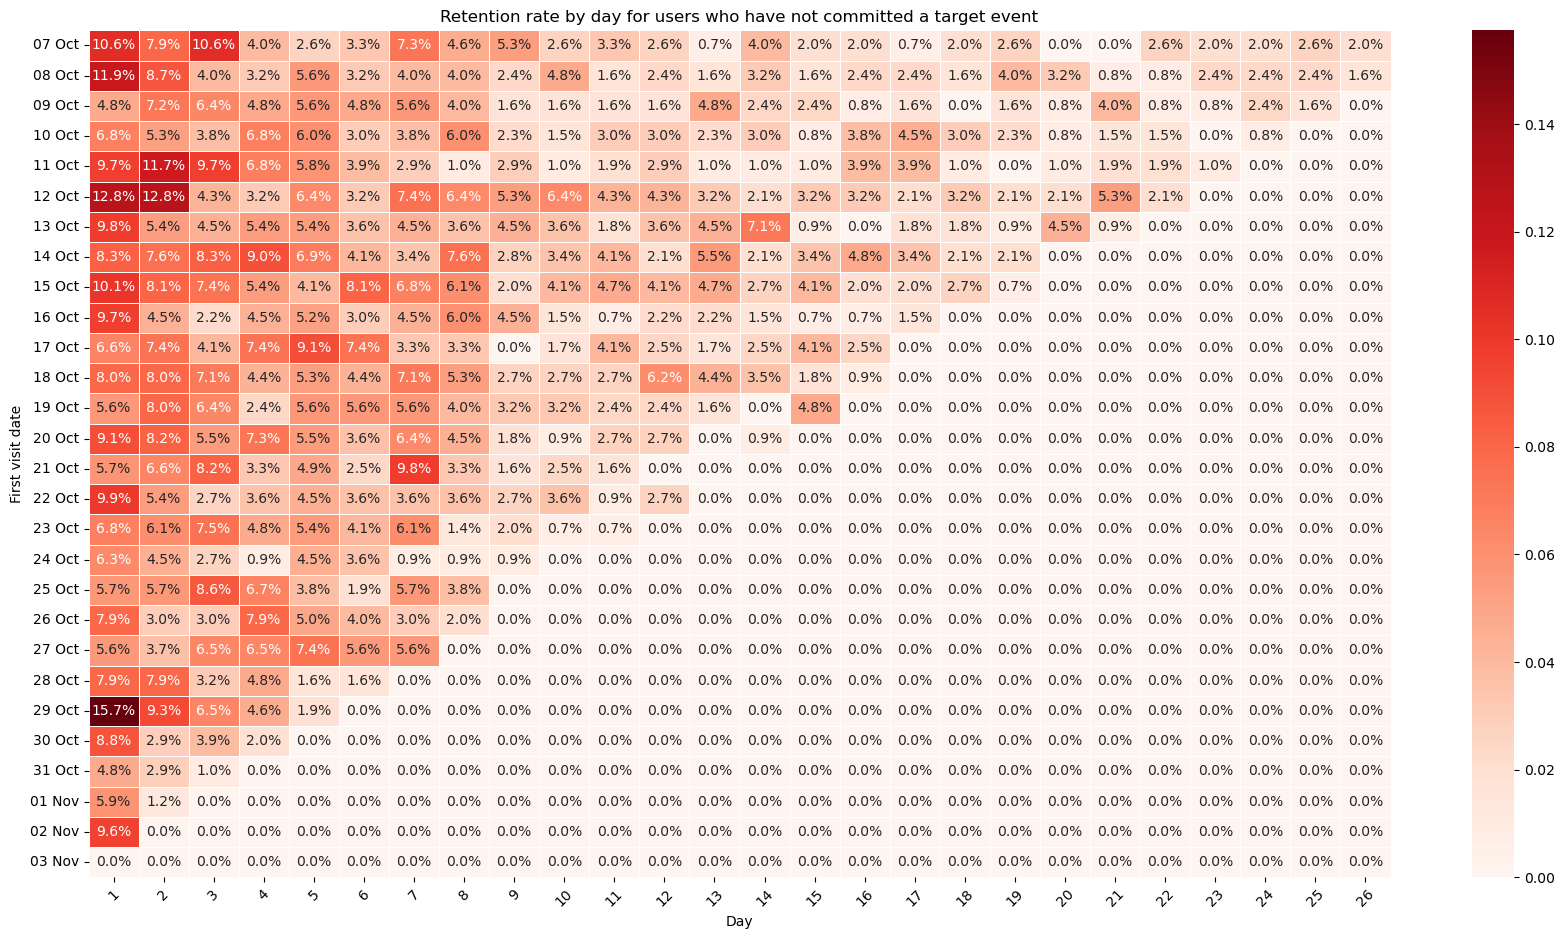

In [48]:
# creation of retention table for users who have not committed a target event
retention_other_users = sessions[~sessions['user_id'].isin(targeted_action_users_list)].pivot_table(index=['first_visit_date'], columns='lifetime', values='user_id', aggfunc='nunique').reset_index()

# cohort size calculation
cohort_sizes_other_users = (sessions[~sessions['user_id'].isin(targeted_action_users_list)].groupby('first_visit_date')
                .agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

# merging cohort sizes and retention table
retention_rate_other_users = cohort_sizes_other_users.merge(retention_other_users, on='first_visit_date', how='left').fillna(0)

# index reset after merging
retention_rate_other_users = retention_rate_other_users.reset_index()

# splitting the retention table data into cohort sizes
retention_rate_other_users.iloc[:, 2:] = retention_rate_other_users.iloc[:, 2:].div(retention_rate_other_users['cohort_size'], axis=0)

# deleting the cohort_size and index columns
retention_rate_other_users.drop(columns=['cohort_size'], inplace=True)
retention_rate_other_users.drop(columns=['index'], inplace=True)

# deleting the first_visit_date column
retention_rate_other_users = retention_rate_other_users.drop(columns=['first_visit_date'])

# creating a new column with dates in the format "07 Oct" in order up to "03 Nov"
start_date = pd.to_datetime('2019-10-07')
end_date = pd.to_datetime('2019-11-03')
dates = [start_date + pd.Timedelta(days=i) for i in range(28)]
date_strings = [date.strftime('%d %b') for date in dates]

# adding a new column to a dataframe
retention_rate_other_users['first_visit'] = date_strings
cols = list(retention_rate_other_users.columns)
cols = [cols[-1]] + cols[:-1]
retention_rate_other_users = retention_rate_other_users[cols]

# deletion of the first column with the first day of lifetime, where retention rate is 100% for better visibility heatmap
retention_rate_other_users = retention_rate_other_users.drop(columns=[0])

# heat map of retention for users who have not committed a target event
plt.figure(figsize=(21, 11))
sns.heatmap(retention_rate_other_users.set_index('first_visit'), cmap="Reds", annot=True, fmt=".1%", linewidths=.5)
plt.title('Retention rate by day for users who have not committed a target event')
plt.xlabel('Day')
plt.ylabel('First visit date')
plt.xticks(rotation=45)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- Users who made a target event in the app have a much higher retention rate than users who didn't. And the retention rate is higher throughout the whole 7-day lifetime.
- For users who committed a targeted action, this rate on day 7 ranges from 6.2% to 23.3%, with the high rates being higher. In the first days of the Lifetime, this indicator reaches 35.3%.
- The rest of the users have a much lower rate: on the seventh day it ranges from 1.9% to 8.1% (up to 9.8% on the eighth day). At the same time, even in the first days of Lifetime, the maximum retention rate is only 15.7%.

In [66]:
# creating a new sources dataset with unique user_id and source pairs
sources = df_filtered.drop_duplicates(subset=['user_id', 'source'])

# saving only the user_id and source columns in the dataset
sources = sources.loc[:, ['user_id', 'source']]

# compiling user profiles with the number of sessions in each user's application, their total duration, the number 
# of actions on average per session, as well as information on whether the user performed a targeted action - browsing through 
# the seller's contacts and from what source the user installed the application
users_profiles = sessions.groupby('user_id').agg({'session_num' : 'max', 
                                                  'duration':'sum', 
                                                  'events_count':'mean'}).reset_index()

# adding information about the source of the application installation
users_profiles = users_profiles.merge(sources, on='user_id', how='left')
users_profiles.head(10)

,user_id,session_num,duration,events_count,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,46.009285,8.750000,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,6,196.236810,11.833333,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,1,24.707917,10.000000,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6,110.739310,5.333333,google
4,00551e79-152e-4441-9cf7-565d7eb04090,3,9.327742,2.666667,yandex
5,00554293-7e00-4122-b898-4e892c4a7c53,2,7.047807,5.500000,yandex
6,005fbea5-2678-406f-88a6-fbe9787e2268,1,10.802260,5.000000,yandex
7,00653802-5ff1-4071-bc17-347fc4cef569,1,8.506064,5.000000,google
8,006a32d4-ee10-40dc-b237-11e0fde81cbc,1,15.689247,6.000000,yandex
9,006f6ced-225b-4f9c-9f17-23404bc6835f,1,9.076371,5.000000,yandex


In [67]:
# for each event create a column with a sign whether the user committed it or not
for event in list(df_filtered['event_name'].unique()):
    event_users = list(df_filtered[df_filtered['event_name'] == event]['user_id'].unique())
    users_profiles[event] = False
    for user in event_users:
        users_profiles.loc[users_profiles['user_id'] == user, event] = True

users_profiles.head()

,user_id,session_num,duration,events_count,source,tips_show,map,search_1,photos_show,favorites_add,contacts_show,contacts_call,advert_open,search_7,search_5,search_4,search_6,search_3,tips_click,search_2
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,46.009285,8.750000,other,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,00157779-810c-4498-9e05-a1e9e3cedf93,6,196.236810,11.833333,yandex,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
2,00463033-5717-4bf1-91b4-09183923b9df,1,24.707917,10.000000,yandex,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6,110.739310,5.333333,google,True,True,False,False,False,False,False,True,True,True,True,True,True,False,False
4,00551e79-152e-4441-9cf7-565d7eb04090,3,9.327742,2.666667,yandex,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False


In [68]:
# general information on numeric columns users_profiles
users_profiles.describe(percentiles=[0.05, 0.25, 0.50, 0.90, 0.95, 0.99])

,session_num,duration,events_count
count,4228.000000,4228.000000,4228.000000
mean,2.436850,31.579430,8.403293
std,3.559164,63.124788,8.408331
min,1.000000,0.000000,1.000000
5%,1.000000,1.226098,2.000000
25%,1.000000,6.341427,4.000000
50%,1.000000,15.501253,6.000000
90%,4.000000,67.053756,17.000000
95%,7.000000,113.099948,23.000000
99%,17.000000,253.889848,41.486667


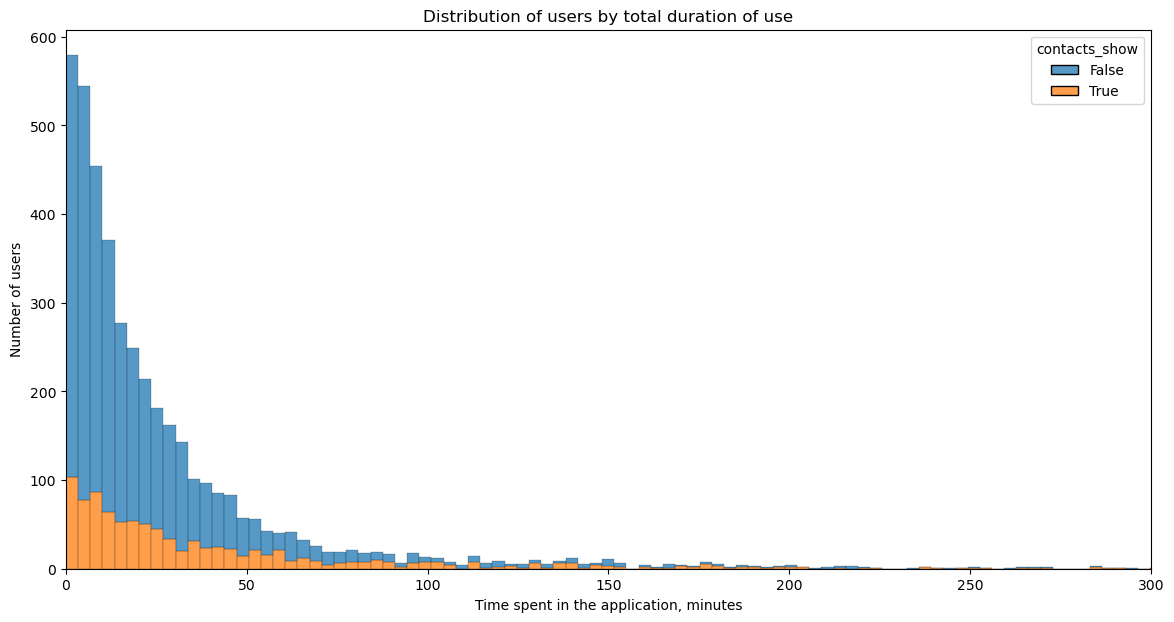

In [73]:
# construction of a histogram with distribution of total time in the application by users
plt.figure(figsize = (13, 6))
sns.histplot(x='duration', data=users_profiles, hue= 'contacts_show', multiple='stack')
plt.xlabel('Time spent in the application, minutes')
plt.ylabel('Number of users')
plt.title('Distribution of users by total duration of use')
plt.xlim(0, 300)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    In general, the distribution of time spent in the app by users who did and did not commit a target event is similar. However, in the group who committed the target event, the graph decreases more smoothly and the "tail" with more time in the application is longer than in the group without the target action. The most frequent users spent up to three minutes in the app, as well as the majority of users spent up to 12 minutes in the app. At the same time, in the group of those who made a target action, the majority of users stayed in the application longer - up to 30 minutes. Thus, users who committed the target event spent more time in the application on average.

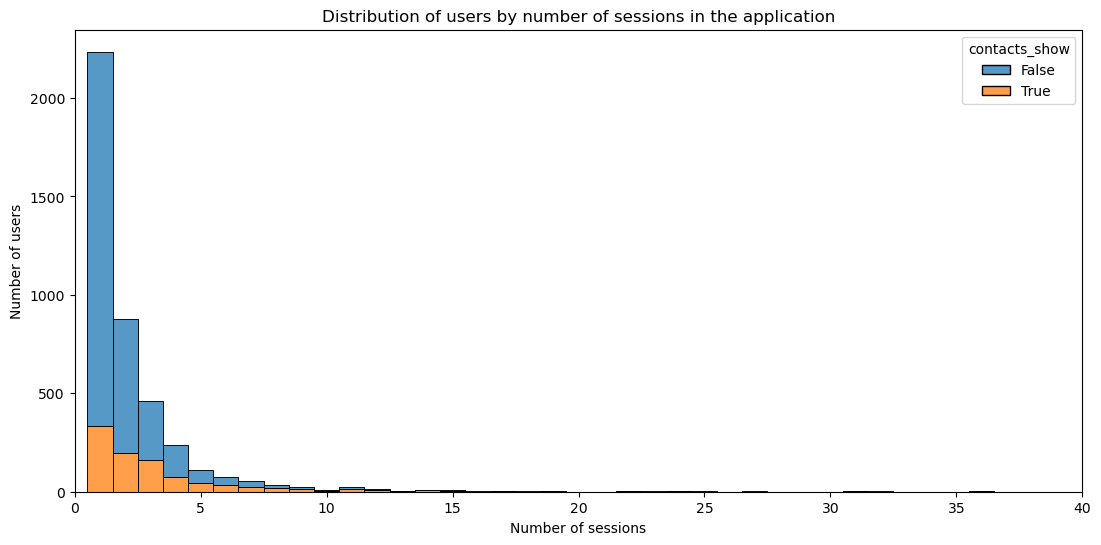

In [75]:
# construction of a histogram with distribution of users by the number of sessions in the application
plt.figure(figsize = (13, 6))
sns.histplot(x='session_num', data=users_profiles, hue='contacts_show', multiple='stack', discrete=True)
plt.xlabel('Number of sessions')
plt.ylabel('Number of users')
plt.title('Distribution of users by number of sessions in the application')
plt.xlim(0, 40)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Most users have made one session in the app. However, in the group of users who have not committed the target event, this is the vast majority of users, and those who have 2 or more sessions are much less - almost three times less. And in the group who committed the target event, the difference in the number of users between 1 and 2-3 sessions is not so significant. This suggests that the users who committed the targeted action logged into the application more often and usually have up to three sessions.

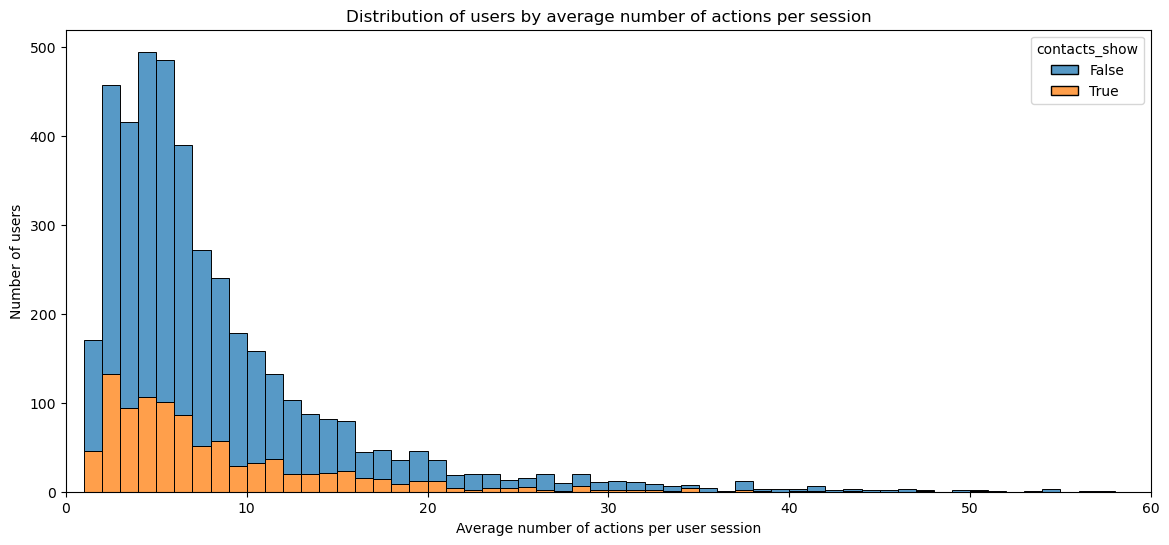

In [79]:
# construction of a histogram of user distribution by the average number of actions during one session
plt.figure(figsize = (14, 6))
sns.histplot(x='events_count', data=users_profiles, hue= 'contacts_show', multiple='stack', binwidth=1)
plt.xlabel('Average number of actions per user session')
plt.ylabel('Number of users')
plt.title('Distribution of users by average number of actions per session')
plt.xlim(0, 60)
plt.show() 

<div style="border:solid green 2px; padding: 20px">
    In both groups, users averaged 2-6 actions per session. According to this indicator, the behavior of users in the two groups is approximately the same. 

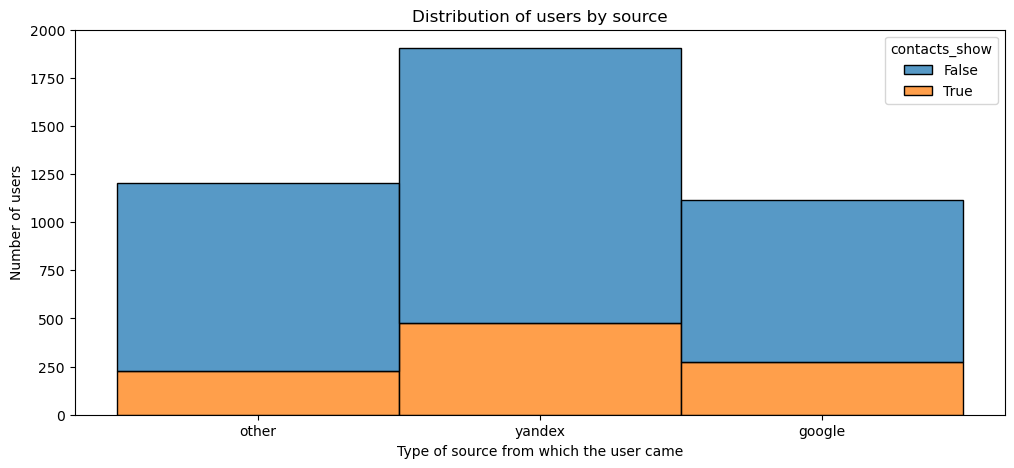

In [80]:
# construction of a histogram of user distribution by source type
plt.figure(figsize = (12, 5))
sns.histplot(x='source', data=users_profiles, hue= 'contacts_show', multiple='stack')
plt.xlabel('Type of source from which the user came')
plt.ylabel('Number of users')
plt.title('Distribution of users by source')
plt.show()

<div style="border:solid green 2px; padding: 20px">
The proportion of users who came to the app from google is greater among those who committed a target event, of the total number of users, than in the group of those who did not commit a target event. Otherwise, the groups are similar in this respect.

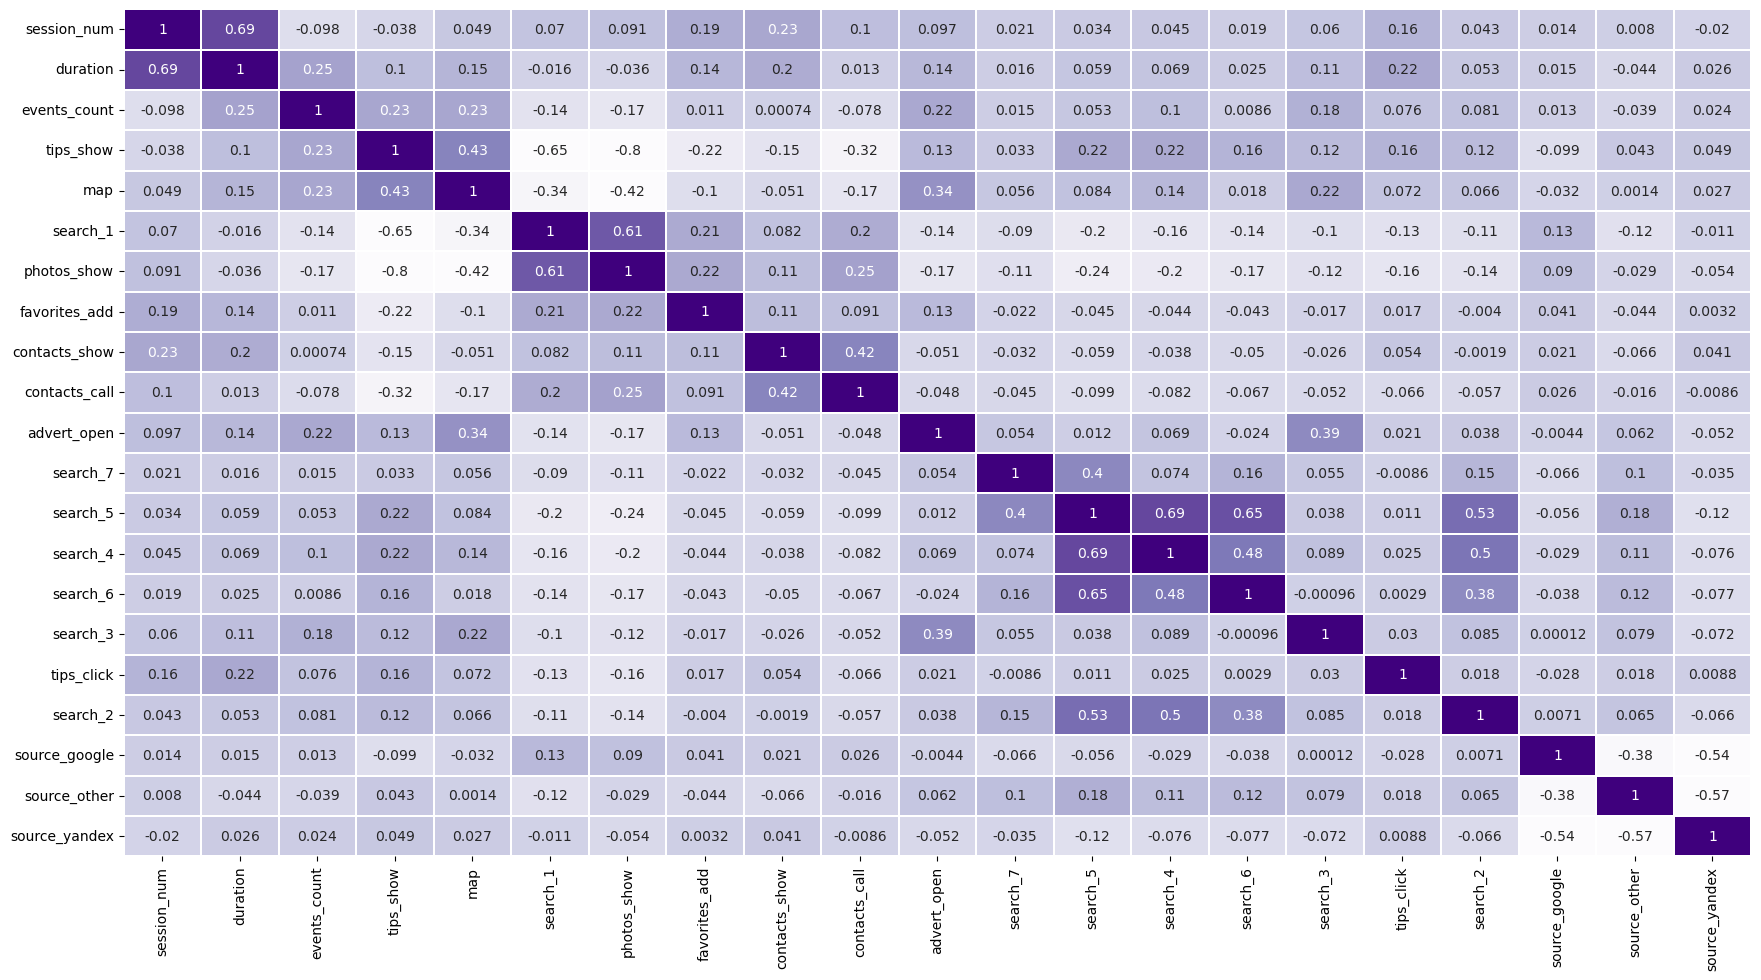

In [83]:
# converting the application installation source into an indicator for building the correlation matrix 
users_profiles = pd.get_dummies(users_profiles, columns=['source'])

# correlation matrix creation
plt.figure(figsize=(21, 11))
sns.heatmap(users_profiles.corr(), annot=True, cmap='Purples', cbar=False, robust=True, linewidths=.2)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Strong correlations are noticeable between total time spent in the app and number of sessions, 0.69; between viewing photos and search event #1, 0.61; between some search events; and between viewing the map and recommended ads, 0.43. A strong negative correlation is noticeable between viewing photos and recommended ads, -0.8; between viewing recommended ads and search event #1, -0.65. As for the target event of viewing contacts, no strong correlation is observed with any other attribute. A moderate correlation of 0.42 is observed with contacts_call. Source views do not have a strong correlation with other columns of the dataset either.